<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [2]:
import torch 
from torch import nn
import matplotlib.pyplot as plt 
 

In [ ]:
# Setup device-agnostic code


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [4]:

weight=0.3
bias=0.9

x=torch.arange( 0 , 1 , .01)
y=weight*x + bias

print(f"Number of X samples: {len(x)}" "\n")
print(f"Number of y samples: {len(y)}" "\n" )
print(f"First 10 X & y samples:\nX: {x[:10]}\ny: {y[:10]}")

Number of X samples: 100

Number of y samples: 100

First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [5]:
split_data = int(.8* len(x))
x_train, y_train=x[:split_data], y[:split_data]
x_test, y_test=x[split_data:], y[split_data:]

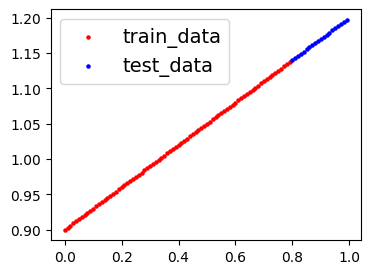

In [8]:
def plot_data(train_datax=x_train,train_datay=y_train, test_datax=x_test , test_datay=y_test , prediction=None):
    plt.figure(figsize=(4 , 3))
    plt.scatter(train_datax, train_datay , c = "r" , s =5 , label="train_data")
    plt.scatter(test_datax, test_datay , c = "b" , s =5 , label="test_data")
    if prediction is not None :
         plt.scatter(x_test, prediction, c='g', s=4 , label="predictions")
    plt.legend(prop={"size":14})
    plt.show()

plot_data()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [28]:
class Linear_Regression(nn.Module):
    def __init__(self):
        super(). __init__()
        self.weight = nn.Parameter(torch.randn(1,  dtype=torch.float32 , requires_grad=True ))
        self.bias = nn.Parameter(torch.randn(1,  dtype=torch.float32 , requires_grad=True ))

    def forward(self , x:torch.Tensor)->torch.tensor :
        return self.weight*x +self.bias
    


In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
model = Linear_Regression()
model.to(device)
print(model.state_dict())


Using device: cpu
OrderedDict({'weight': tensor([-0.2571]), 'bias': tensor([0.3304])})


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [30]:
loss_fun=torch.nn.L1Loss()
optim=torch.optim.SGD(params=model.parameters(), lr=.01)


In [31]:
torch.manual_seed(42)


epochs=300

model.to(device) 
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
  model.train()

  y_predict = model(x_train)


  loss = loss_fun(y_predict , y_train)
  

  
  optim.zero_grad
  

  loss.backward()


  optim.step()
  

  model.eval()  
  with torch.inference_mode():
    y_test_pred = model(x_test)
    test_loss = loss_fun(y_test_pred, y_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

      
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())

Epoch: 0 | Train loss: 0.790 | Test loss: 1.055
Epoch: 20 | Train loss: 0.732 | Test loss: 0.752
Epoch: 40 | Train loss: 0.568 | Test loss: 0.851
Epoch: 60 | Train loss: 0.295 | Test loss: 0.385
Epoch: 80 | Train loss: 0.054 | Test loss: 0.128
Epoch: 100 | Train loss: 0.418 | Test loss: 0.370
Epoch: 120 | Train loss: 0.589 | Test loss: 0.660
Epoch: 140 | Train loss: 0.734 | Test loss: 0.745
Epoch: 160 | Train loss: 0.754 | Test loss: 0.984
Epoch: 180 | Train loss: 0.685 | Test loss: 0.735
Epoch: 200 | Train loss: 0.513 | Test loss: 0.782
Epoch: 220 | Train loss: 0.268 | Test loss: 0.349
Epoch: 240 | Train loss: 0.076 | Test loss: 0.115
Epoch: 260 | Train loss: 0.346 | Test loss: 0.308
Epoch: 280 | Train loss: 0.659 | Test loss: 0.715


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [32]:
# Make predictions with the model
model.eval() 
with torch.inference_mode():  
    y_predict = model(x_test)  


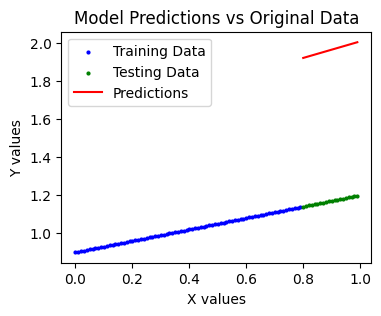

In [36]:
# Plot the predictions (these may need to be on a specific device)


x_train = x_train
y_train = y_train
x_test= x_test
y_test = y_test
y_predict=y_predict


plt.figure(figsize=(4, 3))

plt.scatter(x_train, y_train, c="b",s=4 ,  label="Training Data")


plt.scatter(x_test, y_test, c="g", s=4 , label="Testing Data")


plt.plot(x_test, y_predict, c="r" , label="Predictions")

plt.title("Model Predictions vs Original Data")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()



## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [37]:
from pathlib import Path
import torch


model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "simple_model.pth"
model_save_path = model_path / model_name


print(f"saving model to: {model_save_path}")
torch.save(model.state_dict(), model_save_path)






saving model to: models\simple_model.pth


In [39]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = Linear_Regression()  # نفس اسم الكلاس اللي انتي عرفاه
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.to(device)
loaded_model.eval()

Linear_Regression()

In [40]:
# Make predictions with loaded model and compare them to the previous
with torch.inference_mode():
    y_loaded_pred = loaded_model(x_test)


print(torch.allclose(y_predict, y_loaded_pred))


True
